In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seaborn.set_context('notebook')
seaborn.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [16, 8]

In [4]:
synonyms = pd.read_csv('../source/fixtures/ddf--open_numbers/ddf--synonyms--geo.csv')
wb_groups = pd.read_csv('../source/fixtures/wb_income_groups.csv')
on_income = pd.read_csv('../source/fixtures/on_income_groups.csv')

In [5]:
!ls ../source/fixtures/

brackets.csv				 ddf--open_numbers
ddf--entities--coverage_type.csv	 neighbours_list.json
ddf--entities--geo--on_income_level.csv  on_income_groups.csv
ddf--entities--geo--wb_income_group.csv  povcal_country_year.csv
ddf--entities--geo--west_and_rest.csv	 wb_income_groups.csv
ddf--entities--geo--world_4regions.csv	 west_and_rest.csv


In [6]:
!ls ../datapoints/

ddf--datapoints--population--by--geo--time--income_bracket_50.csv
ddf--datapoints--population_percentage--by--geo--time--income_bracket_50.csv
headcount_200_bracket.pkl


In [7]:
!ls ../../income_mountain/

ddf--datapoints--income_mountain_50bracket_shape_for_log--by--country--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--g77_and_oecd_countries--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--global--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_3groups--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_groups--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--landlocked--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--main_religion_2008--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unhcr_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unicef_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_ldc--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_region--time.csv
ddf--datapoints--income_mountain_50bracket_shape_for_log--b

we have these groups and we need to have shapes for all of them:

- country.csv
- g77_and_oecd_countries.csv
- global.csv
- income_3groups.csv
- income_groups.csv
- landlocked.csv
- main_religion_2008.csv
- unhcr_region.csv
- unicef_region.csv
- un_sdg_ldc.csv
- un_sdg_region.csv
- west_and_rest.csv
- world_4region.csv
- world_6region.csv

income_groups and income_3groups comes from WB.

In [8]:
# load data
data = pd.read_csv('../datapoints/ddf--datapoints--population--by--geo--time--income_bracket_50.csv')

In [9]:
data

,geo,time,bracket,population
0,afg,1800,0,32
1,afg,1800,1,53
2,afg,1800,2,88
3,afg,1800,3,150
4,afg,1800,4,263
...,...,...,...,...
2447245,zwe,2050,45,443
2447246,zwe,2050,46,255
2447247,zwe,2050,47,139
2447248,zwe,2050,48,71


In [10]:
max_heights = dict()

In [11]:
max_heights['country'] = data.groupby('geo')['population'].max()

In [12]:
# income_groups and income_3groups
# we create long series by combining WB and ON groups

In [13]:
wb_groups

,geo,name,time,4 income groups (WB),3 income groups (WB)
0,afg,Afghanistan,1987,Low income,Low income
1,afg,Afghanistan,1988,Low income,Low income
2,afg,Afghanistan,1989,Low income,Low income
3,afg,Afghanistan,1990,Low income,Low income
4,afg,Afghanistan,1991,Low income,Low income
...,...,...,...,...,...
6659,zwe,Zimbabwe,2016,Low income,Low income
6660,zwe,Zimbabwe,2017,Low income,Low income
6661,zwe,Zimbabwe,2018,Lower middle income,Middle income
6662,zwe,Zimbabwe,2019,Lower middle income,Middle income


In [14]:
wb_groups.columns

Index(['geo', 'name', 'time', '4 income groups (WB)', '3 income groups (WB)'], dtype='object')

In [15]:
wb = wb_groups[['geo', 'time', "4 income groups (WB)"]].copy()

In [16]:
wb.columns = ['geo', 'time', 'level']

In [17]:
on_income.columns = ['geo', 'time', 'level']

In [18]:
on_map = {'Level 1': 'l1',
          'Level 2': 'l2',
          'Level 3': 'l3',
          'Level 4': 'l4',
         }

wb_map = {'Low income': 'l1',
          'Lower middle income': 'l2',
          'Upper middle income': 'l3',
          'High income': 'l4',
         }

In [19]:
wb['level'] = wb['level'].map(lambda x: wb_map[x])

In [20]:
on = on_income.copy()

In [21]:
on['level'] = on['level'].map(lambda x: on_map[x])

In [22]:
on['level'].unique()

array(['l1', 'l2', 'l3', 'l4'], dtype=object)

In [23]:
wb = wb.set_index(['geo', 'time'])
on = on.set_index(['geo', 'time'])

In [24]:
on.update(wb)

In [25]:
cmp = on['level'] == on_income.set_index(['geo', 'time'])['level'].map(lambda x: on_map[x])

In [26]:
income_groups = on.copy()

In [27]:
income_3groups = income_groups.copy()

In [28]:
concept_id_map = {'l1': 'low_income',
                  'l2': 'lower_middle_income',
                  'l3': 'upper_middle_income',
                  'l4': 'high_income'
                 }

concept_id_map3 = {'l1': 'low_income',
                   'l2': 'middle_income',
                   'l3': 'middle_income',
                   'l4': 'high_income'
                 }

In [29]:
income_groups['level'] = income_groups['level'].map(lambda x: concept_id_map[x])

In [30]:
income_3groups['level'] = income_3groups['level'].map(lambda x: concept_id_map3[x])

In [31]:
income_3groups['level'].unique()

array(['low_income', 'middle_income', 'high_income'], dtype=object)

In [32]:
income_groups['level'].unique()

array(['low_income', 'lower_middle_income', 'upper_middle_income',
       'high_income'], dtype=object)

In [33]:
income_groups

level
geo time                     
afg 1800           low_income
    1801           low_income
    1802           low_income
    1803           low_income
    1804           low_income
...                       ...
zwe 2046  lower_middle_income
    2047  lower_middle_income
    2048  lower_middle_income
    2049  lower_middle_income
    2050  lower_middle_income

[48945 rows x 1 columns]

In [34]:
# income_groups.to_csv('../precomputed/income_groups-wb2020.csv')
# income_3groups.to_csv('../precomputed/income_3groups-wb2020.csv')

In [35]:
df = data.copy()

In [36]:
df

,geo,time,bracket,population
0,afg,1800,0,32
1,afg,1800,1,53
2,afg,1800,2,88
3,afg,1800,3,150
4,afg,1800,4,263
...,...,...,...,...
2447245,zwe,2050,45,443
2447246,zwe,2050,46,255
2447247,zwe,2050,47,139
2447248,zwe,2050,48,71


In [37]:
df.columns = ['geo', 'time', 'income_bracket_50', 'population']

In [38]:
income_groups = income_groups.sort_index()
income_3groups = income_3groups.sort_index()

In [39]:
# %%timeit
# income_groups['level'].loc[('zwe', 2050)]

In [40]:
# %%timeit
# income_groups['level'].at[('zwe', 2050)]

In [41]:
_d = income_groups['level'].to_dict()

In [42]:
# %%timeit
# _d[('zwe', 2050)]

In [43]:
_lv = income_groups['level']

In [44]:
# %%time

# ig = [_lv.at[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [45]:
# %%time

# ig = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [46]:
# According to above testing, this one performs best:
ig = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [47]:
df['income_groups'] = ig

In [48]:
res_ig = df.groupby(by=['income_groups', 'time', 'income_bracket_50'])['population'].sum()

<AxesSubplot:xlabel='income_bracket_50'>

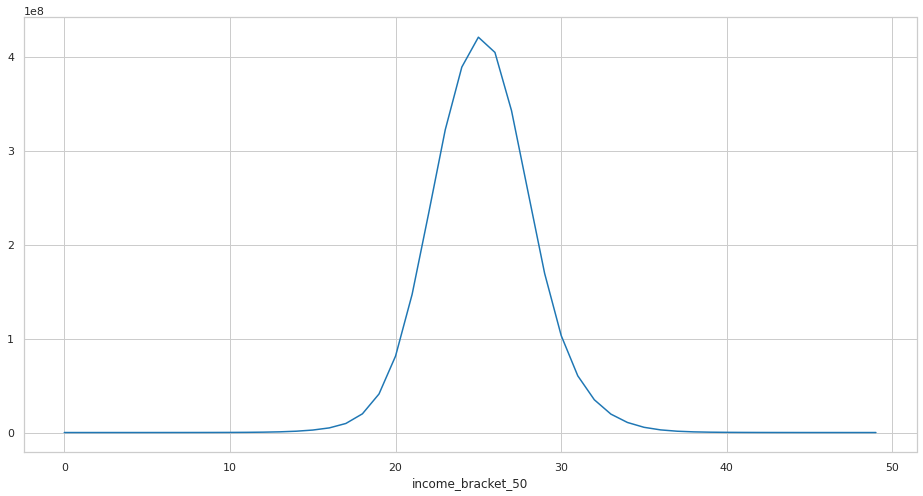

In [49]:
res_ig.loc['upper_middle_income', 2021].plot()

<AxesSubplot:xlabel='income_bracket_50'>

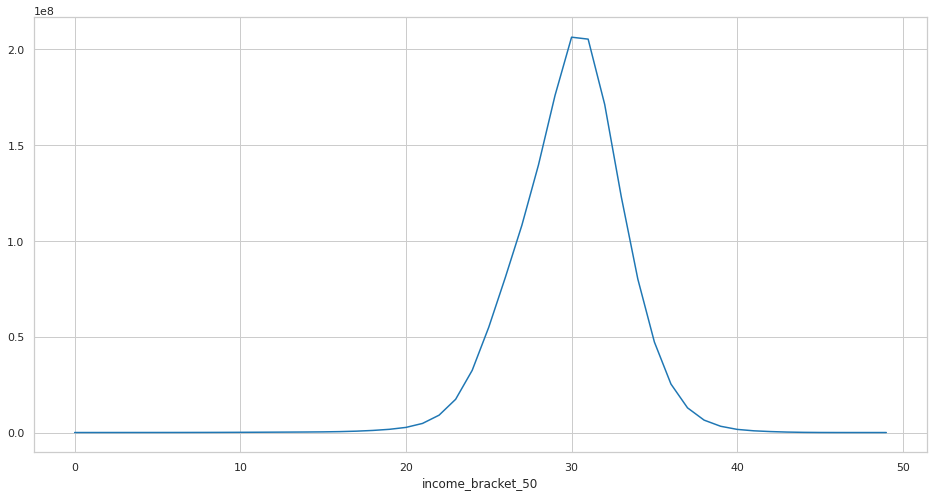

In [50]:
res_ig.loc['high_income', 2021].plot()

In [51]:
res_ig.unstack()

income_bracket_50         0     1     2     3      4      5      6      7   \
income_groups       time                                                     
high_income         1944   0     0     0     0      0      0      0      0   
                    1945   0     0     0     0      0      0      0      0   
                    1946   0     0     0     0      0      0      0      0   
                    1947   0     0     0     0      0      0      0      0   
                    1948   0     0     0     0      0      0      0      0   
...                       ..   ...   ...   ...    ...    ...    ...    ...   
upper_middle_income 2046   0  1396  4802  8705  15828  28213  45828  69475   
                    2047   0  1321  4626  8472  15541  27674  45332  68938   
                    2048   0  1421  4508  8217  15225  27131  44884  68432   
                    2049   0  1227  4190  7599  14204  25362  42316  63913   
                    2050   0  1051  4023  7399  13889  24820  41897  63457   

income_bracket_50             8       9   ...      40      41      42      43  \
income_groups       time                  ...                                   
high_income         1944       0       0  ...      11       5       3       1   
                    1945       0       0  ...      15       8       4       2   
                    1946       0       0  ...      24      12       7       4   
                    1947       0       0  ...      48      23      12       6   
                    1948       0       0  ...      61      29      14       7   
...                          ...     ...  ...     ...     ...     ...     ...   
upper_middle_income 2046  105204  161134  ...  655904  382619  226536  135329   
                    2047  104307  159324  ...  685176  399535  236576  141260   
                    2048  103411  157442  ...  715640  417455  246856  147486   
                    2049   95693  143980  ...  381414  231407  142906   91320   
                    2050   94912  142644  ...  398853  241425  149119   94995   

income_bracket_50            44     45     46     47     48    49  
income_groups       time                                           
high_income         1944      1      0      0      0      0     0  
                    1945      1      0      0      0      0     0  
                    1946      2      1      1      0      0     0  
                    1947      4      2      1      1      0     0  
                    1948      4      2      1      1      0     0  
...                         ...    ...    ...    ...    ...   ...  
upper_middle_income 2046  82006  51639  32531  20882  13308  8353  
                    2047  85402  53755  33817  21690  13823  8688  
                    2048  89029  55946  35179  22559  14384  9051  
                    2049  59165  39194  25749  17046  11035  7003  
                    2050  61562  40737  26791  17725  11498  7315  

[774 rows x 50 columns]

In [52]:
res_ig.unstack().apply(lambda r: r.astype(str).str.cat(sep=','), axis=1)

income_groups        time
high_income          1944    0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,5,9,16,31,65,1...
                     1945    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,6,10,16,28,51,...
                     1946    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,4,7,11,18,30,5...
                     1947    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,6,11,18,32...
                     1948    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,6,10,18,...
                                                   ...                        
upper_middle_income  2046    0,1396,4802,8705,15828,28213,45828,69475,10520...
                     2047    0,1321,4626,8472,15541,27674,45332,68938,10430...
                     2048    0,1421,4508,8217,15225,27131,44884,68432,10341...
                     2049    0,1227,4190,7599,14204,25362,42316,63913,95693...
                     2050    0,1051,4023,7399,13889,24820,41897,63457,94912...
Length: 774, dtype: object

In [53]:
def concat_values(ser):
    res = ser.unstack().apply(lambda r: r.astype(str).str.cat(sep=','), axis=1)
    res.name = 'income_mountain_50bracket_shape_for_log'
    return res

In [54]:
res_ig

income_groups        time  income_bracket_50
high_income          1944  0                        0
                           1                        0
                           2                        0
                           3                        0
                           4                        0
                                                ...  
upper_middle_income  2050  45                   40737
                           46                   26791
                           47                   17725
                           48                   11498
                           49                    7315
Name: population, Length: 38700, dtype: int64

In [55]:
max_heights['income_groups'] = res_ig.groupby('income_groups').max()

In [56]:
res_ig = concat_values(res_ig)

In [57]:
res_ig.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_groups--time.csv')

In [58]:
_d = income_3groups['level'].to_dict()

In [59]:
ig3 = [_d[(row['geo'], row['time'])] for _, row in df.iterrows()]

In [60]:
df['income_3groups'] = ig3

In [61]:
res_ig3 = df.groupby(by=['income_3groups', 'time', 'income_bracket_50'])['population'].sum()

In [62]:
max_heights['income_3groups'] = res_ig3.groupby('income_3groups').max()

In [63]:
res_ig3 = concat_values(res_ig3)

In [64]:
res_ig3

income_3groups  time
high_income     1944    0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,5,9,16,31,65,1...
                1945    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,6,10,16,28,51,...
                1946    0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,4,7,11,18,30,5...
                1947    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,6,11,18,32...
                1948    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,6,10,18,...
                                              ...                        
middle_income   2046    717,5452,16833,31163,51731,82931,129207,198817...
                2047    580,5098,16336,30792,51478,82421,128480,197441...
                2048    464,4949,16757,33883,57288,90802,140214,213239...
                2049    5692,12461,27375,50179,82135,129097,201636,311...
                2050    5471,11872,26462,49312,81122,127422,199172,307...
Name: income_mountain_50bracket_shape_for_log, Length: 609, dtype: object

In [65]:
res_ig3.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--income_3groups--time.csv')

In [66]:
res_ig3.at[('middle_income', 2050)]

'5471,11872,26462,49312,81122,127422,199172,307104,477759,763176,1249594,2088217,3571540,6170990,10578673,18026971,30596563,52270490,88693537,142408937,212446703,299654333,414669361,578538060,719553135,724021431,600215147,435759413,294542294,192719151,120597518,72169136,41972103,23904318,13470237,7531959,4211745,2362643,1350004,794872,475638,292705,183319,117728,76496,50399,32923,21528,13791,8646'

In [67]:
countries = pd.read_csv('../source/fixtures/ddf--open_numbers/ddf--entities--geo--country.csv')

In [68]:
# g77_and_oecd_countries

In [69]:
k = 'g77_and_oecd_countries'

In [70]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [71]:
# this one missing in open_numbers ontology
_d['ssd'] = 'g77'

In [72]:
def _f(x):
    try:
        return _d[x]
    except KeyError:
        print(x)
        return None
df[k] = df['geo'].map(_f)

In [73]:
res_g77 = df.groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [74]:
max_heights[k] = res_g77.groupby(k).max()

In [75]:
res_g77 = concat_values(res_g77)

In [76]:
res_g77

g77_and_oecd_countries  time
g77                     1800    291000,420391,568779,766687,1038594,1441286,20...
                        1801    293156,423145,572407,771480,1045080,1450532,20...
                        1802    295291,425856,575984,776194,1051460,1459573,20...
                        1803    297197,428358,579323,780650,1057545,1468266,21...
                        1804    299617,431464,583442,786156,1065039,1478913,21...
                                                      ...                        
others                  2046    0,2,25,55,103,202,318,477,692,1005,1623,2509,3...
                        2047    0,2,23,54,96,193,309,467,676,979,1569,2430,378...
                        2048    0,0,21,51,90,187,305,465,674,975,1547,2389,370...
                        2049    0,0,17,49,86,183,297,454,663,952,1504,2313,357...
                        2050    0,0,17,47,78,178,291,449,653,937,1463,2248,345...
Name: income_mountain_50bracket_shape_for_log, Length: 753, dtype: ob

In [77]:
res_g77.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--g77_and_oecd_countries--time.csv')

In [78]:
# global

In [79]:
df['global'] = 'world'

In [80]:
res_glob = df.groupby(by=['global', 'time', 'income_bracket_50'])['population'].sum()

In [81]:
max_heights['global'] = res_glob.groupby('global').max()

In [82]:
res_glob = concat_values(res_glob)

In [83]:
res_glob

global  time
world   1800    346103,509756,706578,979841,1350928,1898369,27...
        1801    348648,513140,711101,985981,1359430,1910577,27...
        1802    350514,515321,714251,990188,1365315,1918972,27...
        1803    352520,517789,717894,995316,1372431,1929195,27...
        1804    354811,520279,721530,1000312,1379347,1939144,2...
                                      ...                        
        2046    6443,15910,48040,85282,133583,201460,302159,45...
        2047    6185,14916,47565,85889,135142,202974,303180,45...
        2048    5948,14164,44657,82408,130581,196515,294327,44...
        2049    5700,13036,42056,80519,128625,193681,290251,43...
        2050    5478,12334,39923,78831,126719,190950,286340,42...
Name: income_mountain_50bracket_shape_for_log, Length: 251, dtype: object

In [84]:
res_glob.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--global--time.csv')

In [85]:
# landlocked

In [86]:
_d = countries.set_index('country')['landlocked'].dropna().to_dict()

In [87]:
def _f(x):
    try:
        return _d[x]
    except KeyError:
        print(x)
        return None
df['landlocked'] = df['geo'].map(_f)

In [88]:
res_llock = df.groupby(by=['landlocked', 'time', 'income_bracket_50'])['population'].sum()

In [89]:
res_llock

landlocked  time  income_bracket_50
coastline   1800  0                     325671
                  1                     481359
                  2                     667990
                  3                     927212
                  4                    1277869
                                        ...   
landlocked  2050  45                      9458
                  46                      6014
                  47                      3612
                  48                      2061
                  49                      1144
Name: population, Length: 25100, dtype: int64

In [90]:
max_heights['landlocked'] = res_llock.reset_index().groupby('landlocked')['population'].max()

In [91]:
res_llock = concat_values(res_llock)

In [92]:
res_llock.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--landlocked--time.csv')

In [93]:
# main_religion_2008

In [94]:
k = 'main_religion_2008'

In [95]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [96]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [97]:
missing

{'ben',
 'bih',
 'caf',
 'civ',
 'gnb',
 'isr',
 'kor',
 'lbn',
 'lbr',
 'mdg',
 'mng',
 'mus',
 'nga',
 'prk',
 'sle',
 'ssd',
 'tgo'}

In [98]:
countries[k].unique()

array([nan, 'christian', 'muslim', 'eastern_religions'], dtype=object)

In [99]:
res_rel = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [100]:
max_heights[k] = res_rel.groupby(k).max()

In [101]:
res_rel = concat_values(res_rel)

In [102]:
res_rel

main_religion_2008  time
christian           1800    68584,109834,163971,242919,349526,504478,74347...
                    1801    68975,110495,164882,244226,351433,507256,74750...
                    1802    68680,109951,164406,243618,350768,506346,74625...
                    1803    68769,109930,164724,244256,351730,507752,74830...
                    1804    68602,109286,164197,243651,351001,506831,74716...
                                                  ...                        
muslim              2046    0,159,731,1651,3060,4913,7553,11373,17474,2784...
                    2047    0,138,706,1603,3024,4852,7496,11269,17279,2742...
                    2048    0,115,695,1544,2799,4470,6976,10565,16338,2611...
                    2049    0,94,666,1499,2771,4426,6929,10463,16138,25685...
                    2050    0,54,639,1438,2722,4337,6823,10306,15866,25186...
Name: income_mountain_50bracket_shape_for_log, Length: 753, dtype: object

In [103]:
res_rel.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--main_religion_2008--time.csv')

In [104]:
# unhcr_region

In [105]:
k = 'unhcr_region'

In [106]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [107]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [108]:
missing

{'twn'}

In [109]:
res_ur = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [110]:
max_heights[k] = res_ur.groupby(k).max()

In [111]:
res_ur = concat_values(res_ur)

In [112]:
res_ur

unhcr_region               time
unhcr_americas             1800    6529,10933,16547,24425,34742,49032,69489,10007...
                           1801    6569,11002,16618,24548,34932,49314,69912,10074...
                           1802    6604,11089,16731,24685,35168,49663,70434,10156...
                           1803    6680,11203,16928,25013,35593,50243,71257,10279...
                           1804    6704,11269,17037,25203,35871,50655,71890,10382...
                                                         ...                        
unhcr_west_central_africa  2046    3,36,827,2418,4800,7919,12290,19042,30494,5064...
                           2047    3,33,706,2333,4701,7785,12106,18743,29902,4951...
                           2048    3,30,622,2152,4255,7076,11126,17403,28032,4681...
                           2049    2,28,566,2080,4215,7037,11088,17305,27735,4608...
                           2050    2,26,449,1989,4136,6942,10986,17141,27385,4537...
Name: income_mountain_50bracket_s

In [113]:
res_ur.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unhcr_region--time.csv')

In [114]:
# unicef_region

In [115]:
k = 'unicef_region'

In [116]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [117]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [118]:
missing

{'hkg', 'twn'}

In [119]:
res_unr = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [120]:
max_heights[k] = res_unr.groupby(k).max()

In [121]:
res_unr = concat_values(res_unr)

In [122]:
res_unr

unicef_region  time
eap            1800    244294,352108,474330,638564,854953,1167604,164...
               1801    246368,354724,477790,643195,861265,1176640,166...
               1802    248441,357332,481250,647774,867470,1185432,167...
               1803    250260,359692,484399,652013,873263,1193711,168...
               1804    252409,362395,487970,656782,879759,1202991,169...
                                             ...                        
ssa            2046    743,6364,23671,44823,71611,110422,167777,25695...
               2047    604,5973,24174,46694,74777,114381,172607,26187...
               2048    484,5589,22237,44454,71792,110230,167324,25444...
               2049    347,4969,21110,43790,71357,109525,166520,25255...
               2050    240,4421,20158,43265,70983,108885,165863,25095...
Name: income_mountain_50bracket_shape_for_log, Length: 1757, dtype: object

In [123]:
res_unr.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--unicef_region--time.csv')

In [124]:
# un_sdg_ldc

In [125]:
k = 'un_sdg_ldc'

In [126]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [127]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [128]:
missing

set()

In [129]:
res_usl = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [130]:
max_heights[k] = res_usl.groupby(k).max()

In [131]:
res_usl = concat_values(res_usl)

In [132]:
res_usl

un_sdg_ldc              time
un_least_developed      1800    18814,26892,38549,59343,86692,129553,199749,32...
                        1801    18809,26891,38532,59308,86625,129429,199512,31...
                        1802    18771,26845,38479,59241,86531,129274,199243,31...
                        1803    18752,26824,38454,59219,86496,129218,199141,31...
                        1804    18722,26788,38387,59123,86326,128906,198566,31...
                                                      ...                        
un_not_least_developed  2046    5712,9633,24606,40740,62834,95419,143705,21540...
                        2047    5589,9029,23573,39443,61109,92609,139693,20937...
                        2048    5470,8663,22613,38137,59397,89903,135929,20359...
                        2049    5355,8151,21161,36895,57831,87459,132589,19868...
                        2050    5240,7993,19933,35690,56214,84971,129180,19361...
Name: income_mountain_50bracket_shape_for_log, Length: 502, dtype: ob

In [133]:
res_usl.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_ldc--time.csv')

In [134]:
# un_sdg_region

In [135]:
k = 'un_sdg_region'

In [136]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [137]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [138]:
missing

set()

In [139]:
res_usr = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [140]:
max_heights[k] = res_usr.groupby(k).max()

In [141]:
res_usr = concat_values(res_usr)

In [142]:
res_usr

un_sdg_region                 time
un_australia_and_new_zealand  1800    14,23,35,54,84,137,238,447,900,1869,3807,7535,...
                              1801    13,22,34,52,80,130,226,425,857,1783,3650,7247,...
                              1802    13,21,33,50,78,126,219,410,825,1717,3520,6999,...
                              1803    12,21,32,49,76,123,212,396,795,1654,3396,6764,...
                              1804    12,21,31,48,75,119,206,382,764,1589,3270,6522,...
                                                            ...                        
un_sub_saharan_africa         2046    743,6341,23528,44579,71247,109920,167120,25612...
                              2047    604,5951,24036,46456,74418,113883,171953,26104...
                              2048    484,5568,22104,44221,71439,109739,166678,25363...
                              2049    347,4949,20982,43563,71016,109051,165895,25176...
                              2050    240,4421,20034,43044,70647,108416,165243,25017.

In [143]:
res_usr.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--un_sdg_region--time.csv')

In [144]:
# west_and_rest

In [145]:
countries.columns

Index(['country', 'g77_and_oecd_countries', 'income_groups', 'is--country',
       'iso3166_1_alpha2', 'unicode_region_subtag', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'un_state', 'world_4region',
       'world_6region', 'unicef_region', 'income_3groups', 'un_sdg_region',
       'un_sdg_ldc', 'unhcr_region', 'west_and_rest'],
      dtype='object')

In [146]:
k = 'west_and_rest'

In [147]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [148]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [149]:
missing

{'hkg', 'twn'}

In [150]:
res_war = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [151]:
max_heights[k] = res_war.groupby(k).max()

In [152]:
res_war = concat_values(res_war)

In [153]:
res_war

west_and_rest  time
rest           1800    333050,479103,652089,892583,1221048,1712078,24...
               1801    335262,481931,655841,897601,1227876,1721848,25...
               1802    337463,484735,659585,902588,1234676,1731527,25...
               1803    339432,487340,663115,907411,1241372,1741208,25...
               1804    341886,490498,667325,913098,1249148,1752292,25...
                                             ...                        
west           2046    0,486,5441,8680,11516,14117,17098,21345,27937,...
               2047    0,384,5174,8394,11249,13834,16735,20851,27147,...
               2048    0,358,4920,8107,10984,13556,16376,20359,26355,...
               2049    0,0,4258,7819,10726,13285,16026,19883,25602,35...
               2050    0,0,3967,7527,10462,13009,15691,19433,24892,34...
Name: income_mountain_50bracket_shape_for_log, Length: 502, dtype: object

In [154]:
res_war.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--west_and_rest--time.csv')

In [155]:
# world_4region

In [156]:
k = 'world_4region'

In [157]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [158]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [159]:
missing

set()

In [160]:
res_w4r = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [161]:
max_heights[k] = res_w4r.groupby(k).max()

In [162]:
res_w4r = concat_values(res_w4r)

In [163]:
res_w4r

world_4region  time
africa         1800    26074,38328,54864,83616,124146,189370,296892,4...
               1801    26065,38322,54839,83573,124066,189233,296639,4...
               1802    26022,38269,54778,83499,123970,189093,296425,4...
               1803    25990,38242,54743,83463,123927,189042,296339,4...
               1804    26184,38518,55139,84021,124695,190070,297674,4...
                                             ...                        
europe         2046    0,644,3977,6508,8919,11325,13761,16308,18877,2...
               2047    0,384,3754,6251,8648,11027,13437,15959,18507,2...
               2048    0,358,3546,5994,8381,10734,13122,15618,18151,2...
               2049    0,0,3347,5739,8121,10446,12797,15263,17784,203...
               2050    0,0,2935,5487,7860,10155,12481,14918,17415,199...
Name: income_mountain_50bracket_shape_for_log, Length: 1004, dtype: object

In [164]:
res_w4r.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--world_4region--time.csv')

In [165]:
# world_6region

In [166]:
k = 'world_6region'

In [167]:
_d = countries.set_index('country')[k].dropna().to_dict()

In [168]:
missing = set()
def _f(x):
    try:
        return _d[x]
    except KeyError:
        missing.add(x)
        return None
df[k] = df['geo'].map(_f)

In [169]:
missing

set()

In [170]:
res_w6r = df.dropna(subset=[k]).groupby(by=[k, 'time', 'income_bracket_50'])['population'].sum()

In [171]:
max_heights[k] = res_w6r.groupby(by=k).max()

In [172]:
res_w6r = concat_values(res_w6r)

In [173]:
res_w6r

world_6region       time
america             1800    6529,10933,16547,24425,34742,49032,69489,10007...
                    1801    6569,11002,16618,24548,34932,49314,69912,10074...
                    1802    6604,11089,16731,24685,35168,49663,70434,10156...
                    1803    6680,11203,16928,25013,35593,50243,71257,10279...
                    1804    6704,11269,17037,25203,35871,50655,71890,10382...
                                                  ...                        
sub_saharan_africa  2046    743,6364,23671,44822,71609,110417,167766,25692...
                    2047    604,5973,24174,46693,74775,114376,172596,26184...
                    2048    484,5589,22237,44453,71790,110226,167314,25442...
                    2049    347,4969,21110,43789,71355,109521,166510,25252...
                    2050    240,4421,20158,43265,70982,108881,165854,25093...
Name: income_mountain_50bracket_shape_for_log, Length: 1506, dtype: object

In [174]:
res_w6r.to_csv('../../income_mountain/ddf--datapoints--income_mountain_50bracket_shape_for_log--by--world_6region--time.csv')

In [175]:
# now also update the max heights for all groups!

In [176]:
df

,geo,time,income_bracket_50,population,income_groups,income_3groups,g77_and_oecd_countries,global,landlocked,main_religion_2008,unhcr_region,unicef_region,un_sdg_ldc,un_sdg_region,west_and_rest,world_4region,world_6region
0,afg,1800,0,32,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
1,afg,1800,1,53,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
2,afg,1800,2,88,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
3,afg,1800,3,150,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
4,afg,1800,4,263,low_income,low_income,g77,world,landlocked,muslim,unhcr_asia_pacific,sa,un_least_developed,un_central_and_southern_asia,rest,asia,south_asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447245,zwe,2050,45,443,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447246,zwe,2050,46,255,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447247,zwe,2050,47,139,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa
2447248,zwe,2050,48,71,lower_middle_income,middle_income,g77,world,landlocked,christian,unhcr_southern_africa,ssa,un_not_least_developed,un_sub_saharan_africa,rest,africa,sub_saharan_africa


In [177]:
df.columns

Index(['geo', 'time', 'income_bracket_50', 'population', 'income_groups',
       'income_3groups', 'g77_and_oecd_countries', 'global', 'landlocked',
       'main_religion_2008', 'unhcr_region', 'unicef_region', 'un_sdg_ldc',
       'un_sdg_region', 'west_and_rest', 'world_4region', 'world_6region'],
      dtype='object')

In [178]:
# country
k = 'country'
ent = pd.read_csv(f'../../ddf--entities--geo--{k}.csv', dtype=str).set_index(k)
mh = max_heights['country']

In [179]:
ent.columns

Index(['set', 'g77_and_oecd_countries', 'income_groups', 'is--country',
       'iso3166_1_alpha2', 'unicode_region_subtag', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'un_state', 'world_4region',
       'world_6region', 'unicef_region', 'income_3groups', 'un_sdg_region',
       'un_sdg_ldc', 'unhcr_region', 'west_and_rest',
       'income_mountain_50bracket_max_height_for_log'],
      dtype='object')

In [180]:
ent.loc[mh.index, 'income_mountain_50bracket_max_height_for_log'] = mh.astype(str)

In [181]:
ent.to_csv(f'../../ddf--entities--geo--{k}.csv')

In [182]:
# others
for k in ['income_groups',
       'income_3groups', 'g77_and_oecd_countries', 'global', 'landlocked', 'main_religion_2008',
       'unhcr_region', 'unicef_region', 'un_sdg_ldc', 'un_sdg_region',
       'west_and_rest', 'world_4region', 'world_6region']:
    fn = f'../../ddf--entities--geo--{k}.csv'
    ent = pd.read_csv(fn, dtype=str).set_index(k)
    mh = max_heights[k]
    ent.loc[mh.index, 'income_mountain_50bracket_max_height_for_log'] = mh.astype(str)
    ent.to_csv(fn)